# 그래프 시각화

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

### 1. 기상 데이터 csv 파일 불러오기

In [2]:
# csv파일 경로
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, '데이터')
data_path = os.path.join(data_dir, r'전처리/weather_yn_df.csv')

In [3]:
# csv파일 불러기기
weather_yn_df = pd.read_csv(data_path, encoding='cp949')

In [4]:
weather_yn_df

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month
0,108,서울시,2024-01,31,10,0.322581
1,108,서울시,2024-02,29,18,0.620690
2,108,서울시,2024-03,31,19,0.612903
3,108,서울시,2024-04,30,26,0.866667
4,108,서울시,2024-05,31,23,0.741935
...,...,...,...,...,...,...
259,288,밀양시,2024-08,31,21,0.677419
260,288,밀양시,2024-09,30,25,0.833333
261,288,밀양시,2024-10,31,20,0.645161
262,288,밀양시,2024-11,30,26,0.866667


### 2. 월별 그래프 그리기

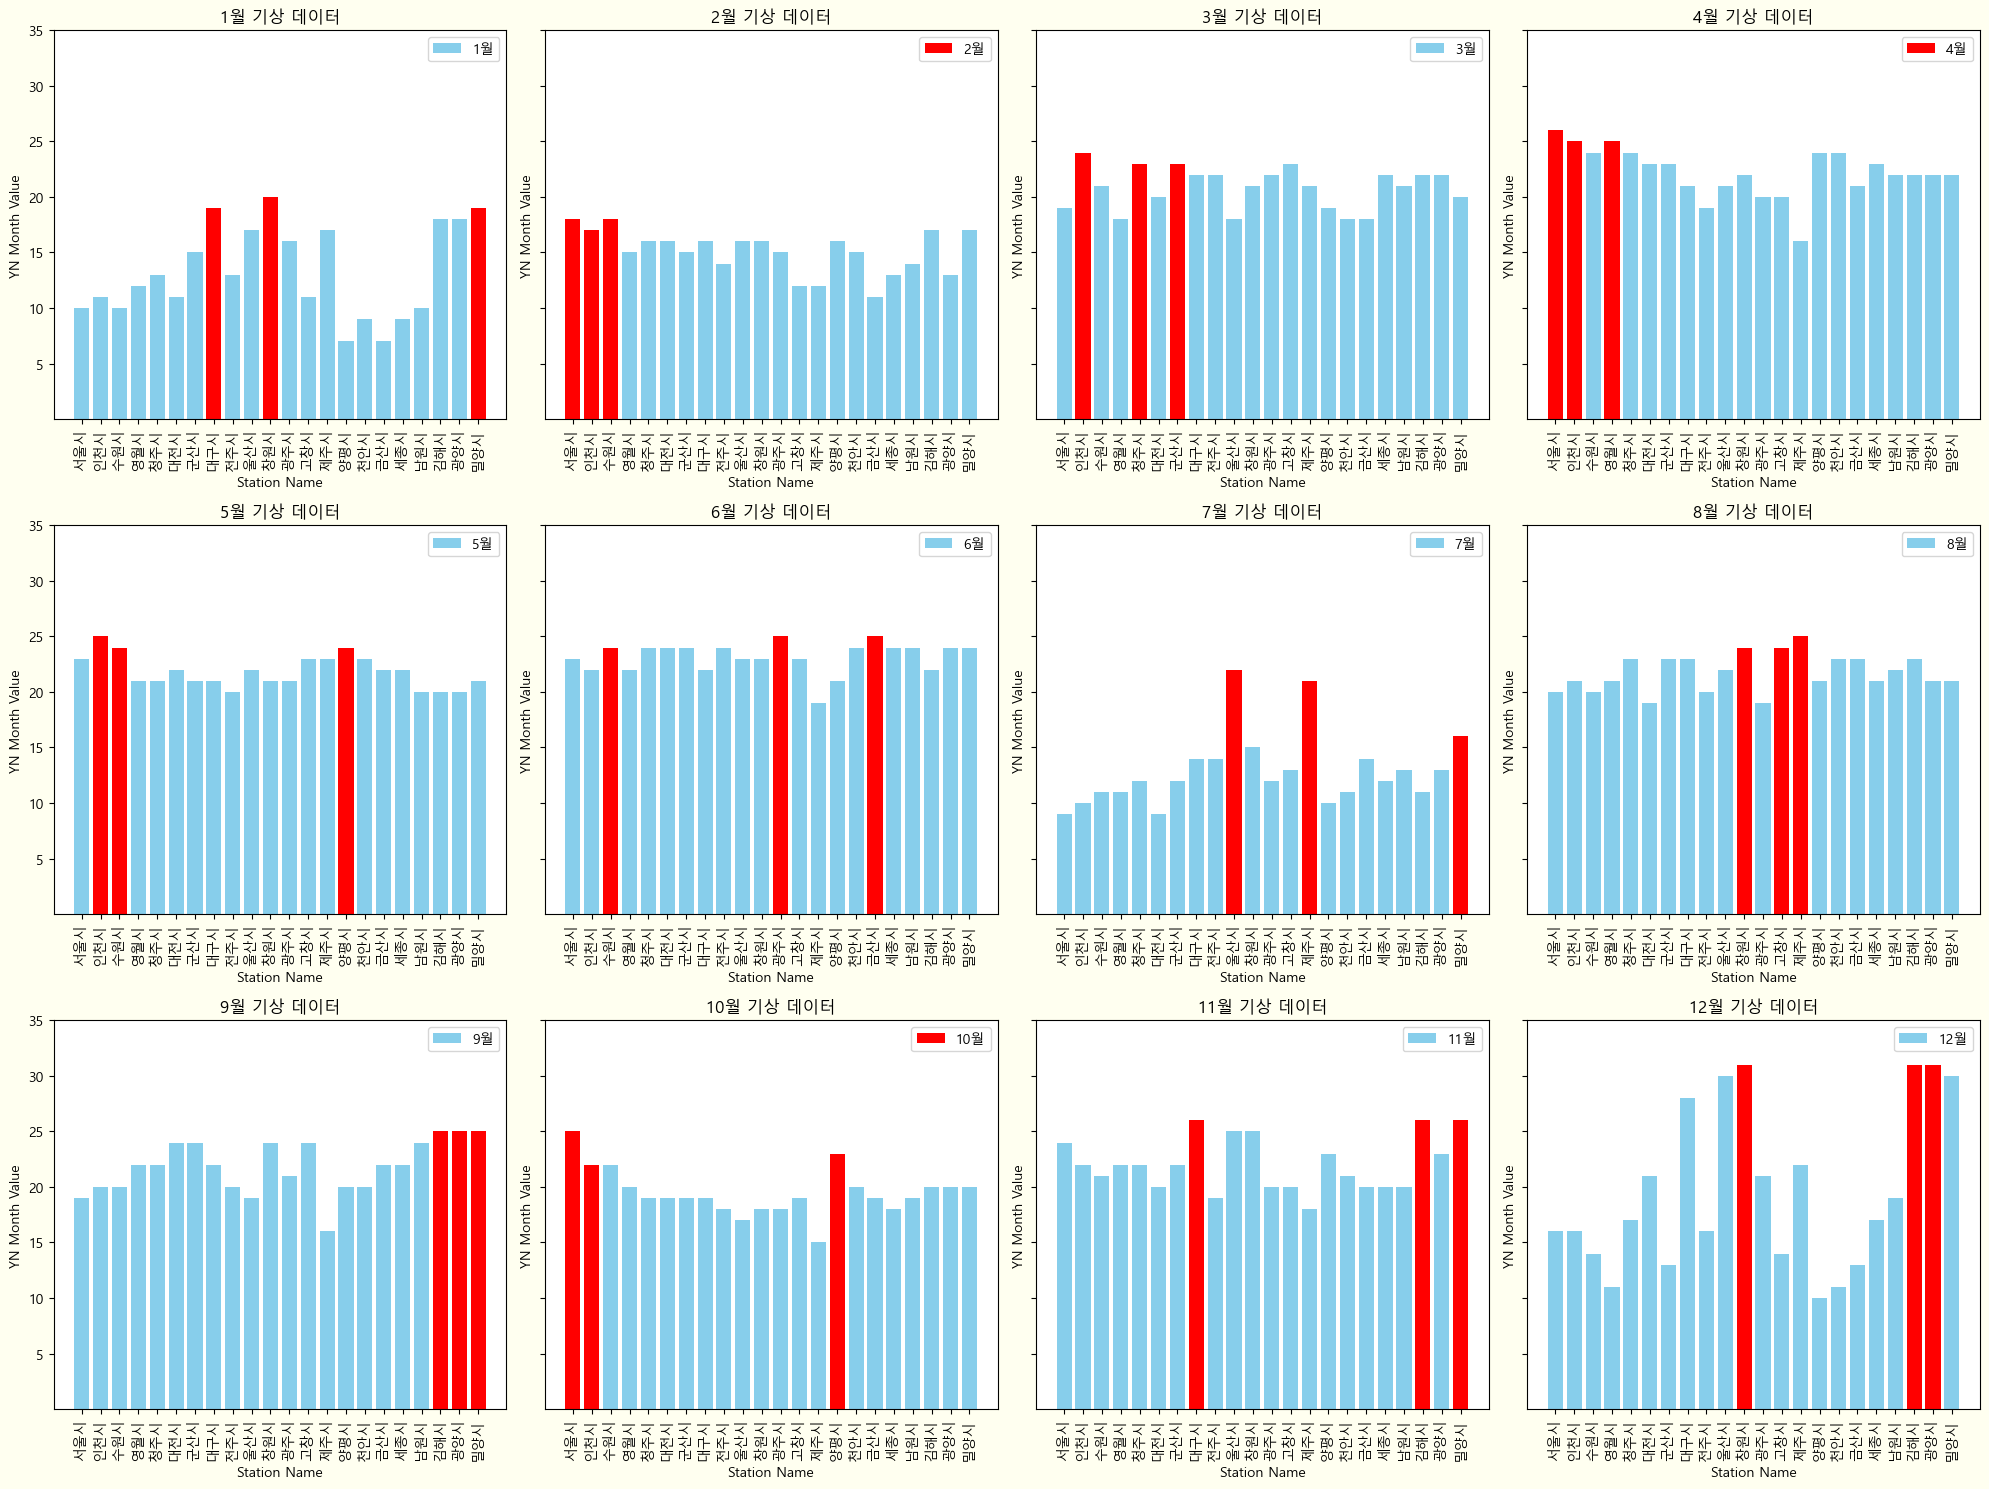

In [5]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 'Malgun Gothic' 사용, 다른 OS에서는 해당 폰트를 설정해 주세요.
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정 (3개의 행, 4개의 열로 총 12개의 그래프)
fig, axes = plt.subplots(3, 4, figsize=(20, 15), facecolor='ivory', sharey=True)

# 각 서브 플롯에 대해 그래프 그리기
for i in range(1, 13):
    row = (i - 1) // 4  # 첫 번째 열 (0), 두 번째 열 (1), 세 번째 열 (2) 결정
    col = (i - 1) % 4   # 열 번호 (0부터 2까지)

    # 해당하는 Axes 객체 선택
    ax = axes[row, col]

    
    # 각 월의 데이터를 사용하여 그래프 그리기
    month = f'0{i}' if i < 10 else f'{i}'
    weather_df = weather_yn_df[weather_yn_df['yyyymm']==f'2024-{month}']

    # 상위 3개 행을 빨간색으로 표시
    top_3_idx = weather_df['yn_month'].nlargest(3).index  # 상위 3개의 인덱스를 선택
    colors = ['red' if idx in top_3_idx else 'skyblue' for idx in weather_df.index]  # 색상을 지정

    # 막대 그래프 그리기
    ax.bar(weather_df['stnNm'], weather_df['yn_month'], color=colors, label=f'{i}월')

    # 제목 및 레이블 설정
    ax.set_title(f'{i}월 기상 데이터', fontsize=12)
    ax.set_xlabel('Station Name', fontsize=10)
    ax.set_ylabel('YN Month Value', fontsize=10)
    ax.tick_params(axis='x', rotation=90)  # x축 레이블 회전
    ax.legend()
    ax.set_yticks(range(5,36,5))

# 서브 플롯 간의 간격을 자동으로 조정
plt.tight_layout()
plt.savefig('월별_top3_지역_그래프.png')
plt.show()


### 2-1) 1월 top 3 데이터 추출하기

In [8]:
weather_yn_df_1 = weather_yn_df[weather_yn_df['yyyymm']==f'2024-01']
top_3_data = weather_yn_df_1.sort_values('yn_month', ascending=False).nlargest(3, 'yn_month')
top_3_data

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month
120,155,창원시,2024-01,31,20,0.645161
252,288,밀양시,2024-01,31,19,0.612903
84,143,대구시,2024-01,31,19,0.612903


### 2-2) 월별 top3 추출하는 데이터 프레임 만들기

In [9]:
import pandas as pd

# 결과를 저장할 리스트
top_cities_all_months = []

# 1월부터 12월까지 각 월에 대해 작업
for i in range(1, 13):
    # 해당 월의 데이터프레임 가져오기
    month = f'0{i}' if i < 10 else f'{i}'
    weather_df = weather_yn_df[weather_yn_df['yyyymm']==f'2024-{month}']
    # 상위 3개 데이터를 추출
    top_3_data = weather_df.sort_values('yn_month', ascending=False).nlargest(3, 'yn_month')

    # 월별 상위 3개 도시를 리스트로 저장
    top_cities = top_3_data[['stnNm']].reset_index(drop=True)
    top_cities['top1'] = top_cities['stnNm'][0]
    top_cities['top2'] = top_cities['stnNm'][1]
    top_cities['top3'] = top_cities['stnNm'][2]
    top_cities = top_cities[['top1', 'top2', 'top3']].iloc[0]

    # 월 정보 추가
    top_cities['month'] = i

    # 리스트에 추가
    top_cities_all_months.append(top_cities)

# 모든 월의 데이터를 하나의 데이터프레임으로 결합
top_cities_df = pd.DataFrame(top_cities_all_months)

# 'month' 컬럼을 인덱스로 설정
top_cities_df.set_index('month', inplace=True)

# 출력
top_cities_df


,top1,top2,top3
month,,,
1,창원시,밀양시,대구시
2,서울시,수원시,인천시
3,인천시,청주시,군산시
4,서울시,영월시,인천시
5,인천시,수원시,양평시
6,광주시,금산시,전주시
7,울산시,제주시,밀양시
8,제주시,창원시,고창시
9,밀양시,광양시,김해시


### 2-3) 월별 그래프 top 3 만 추출하기

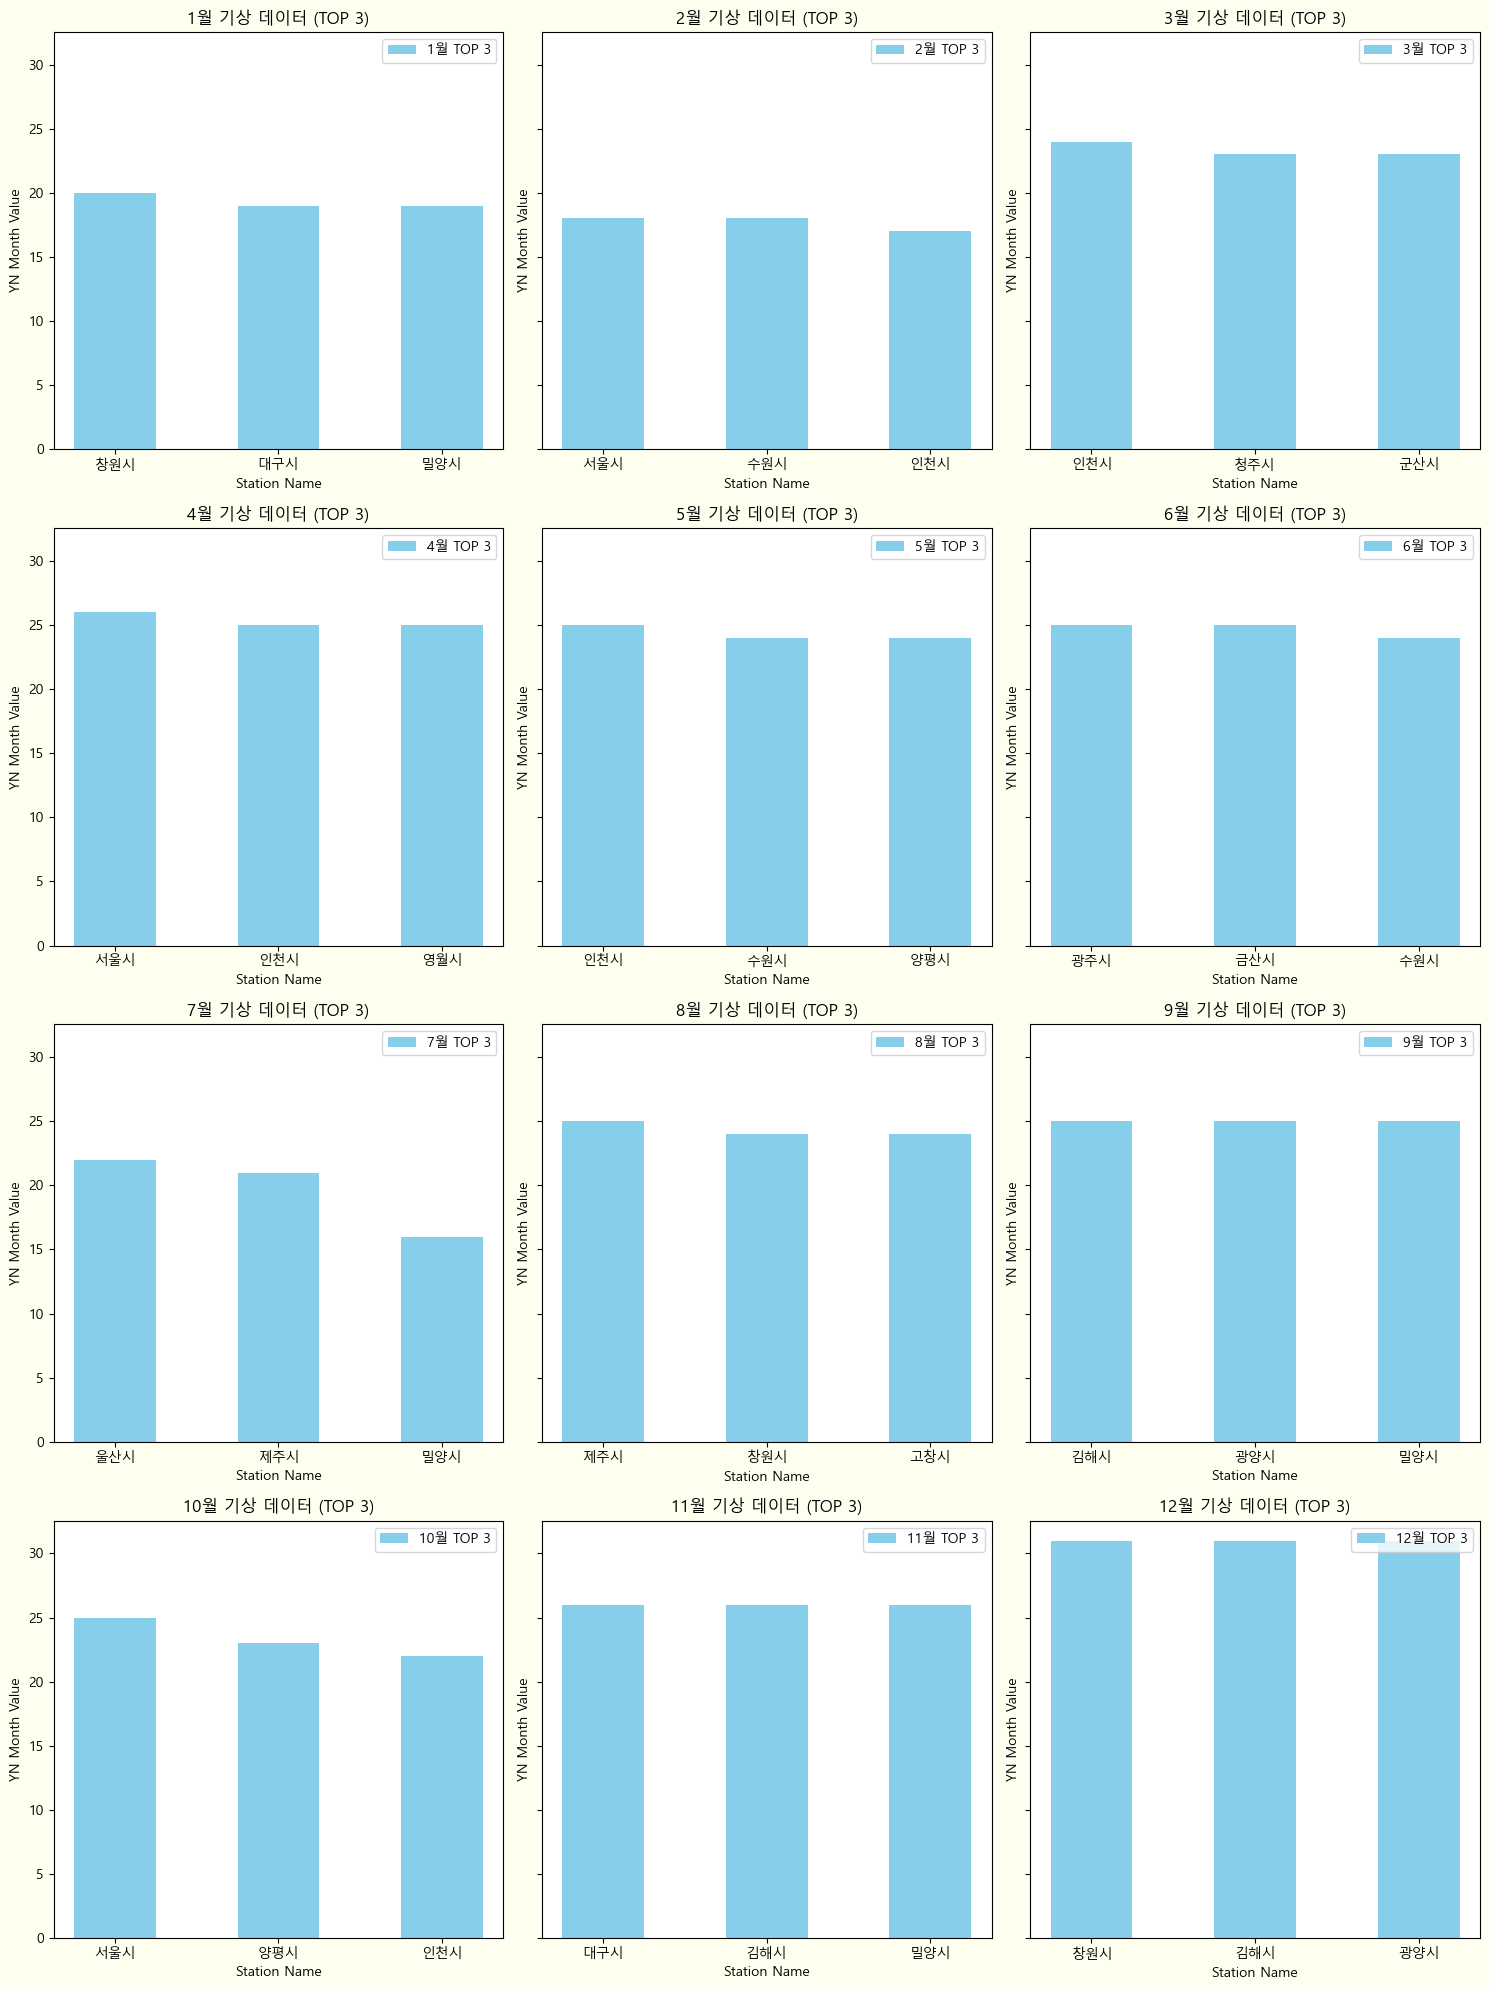

In [10]:
import matplotlib.pyplot as plt

# 그래프 크기 설정 (4개의 행, 3개의 열로 총 12개의 그래프)
fig, axes = plt.subplots(4, 3, figsize=(15, 20), facecolor='ivory', sharey=True)

# 각 서브 플롯에 대해 그래프 그리기
for i in range(1, 13):
    row = (i - 1) // 3  # 첫 번째 열 (0), 두 번째 열 (1), 세 번째 열 (2) 결정
    col = (i - 1) % 3   # 열 번호 (0부터 2까지)

    # 해당하는 Axes 객체 선택
    ax = axes[row, col]

    # 각 월의 데이터를 사용하여 그래프 그리기
    month = f'0{i}' if i < 10 else f'{i}'
    weather_df = weather_yn_df[weather_yn_df['yyyymm']==f'2024-{month}']

    # 상위 3개 행만 선택
    top_3_df = weather_df.nlargest(3, 'yn_month')  # 'yn_month' 기준으로 상위 3개 값 선택

    # 막대 그래프 그리기
    ax.bar(top_3_df['stnNm'], top_3_df['yn_month'], color='skyblue', width=0.5, label=f'{i}월 TOP 3')

    # 제목 및 레이블 설정
    ax.set_title(f'{i}월 기상 데이터 (TOP 3)', fontsize=12)
    ax.set_xlabel('Station Name', fontsize=10)
    ax.set_ylabel('YN Month Value', fontsize=10)
    ax.tick_params(axis='x')  # x축 레이블 회전
    ax.legend()

# 서브 플롯 간의 간격을 자동으로 조정
plt.tight_layout()
plt.show()

## 3) 지역별 그래프 그리기

In [ ]:
# 테이블 나누는 기준 테이블 불러오기
import pandas as pd
weather_yn_df = pd.read_csv('C:/Users/USER/Desktop/스마트 국방/Pandas/크롤링 프로젝트/기상데이터/weather_yn_df.csv', encoding='utf-8')

#### 3-1) 각 지역별 테이블 만들기

In [ ]:
weather_yn_df_seoul = weather_yn_df[weather_yn_df['stnNm']=='서울시']
weather_yn_df.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
0,108,서울시,2024-01-01,31,10,0.322581,서울시,1
1,108,서울시,2024-02-01,29,18,0.620690,서울시,2
2,108,서울시,2024-03-01,31,19,0.612903,서울시,3
3,108,서울시,2024-04-01,30,26,0.866667,서울시,4
4,108,서울시,2024-05-01,31,23,0.741935,서울시,5


In [ ]:
weather_yn_df_incheon = weather_yn_df[weather_yn_df['stnNm']=='인천시']
weather_yn_df_incheon.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
12,112,인천시,2024-01-01,31,11,0.354839,인천시,1
13,112,인천시,2024-02-01,29,17,0.586207,인천시,2
14,112,인천시,2024-03-01,31,24,0.774194,인천시,3
15,112,인천시,2024-04-01,30,25,0.833333,인천시,4
16,112,인천시,2024-05-01,31,25,0.806452,인천시,5


In [ ]:
weather_yn_df_suwon = weather_yn_df[weather_yn_df['stnNm']=='수원시']
weather_yn_df_suwon.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
24,119,수원시,2024-01-01,31,10,0.322581,수원시,1
25,119,수원시,2024-02-01,29,18,0.620690,수원시,2
26,119,수원시,2024-03-01,31,21,0.677419,수원시,3
27,119,수원시,2024-04-01,30,24,0.800000,수원시,4
28,119,수원시,2024-05-01,31,24,0.774194,수원시,5


In [ ]:
weather_yn_df_yeongwol = weather_yn_df[weather_yn_df['stnNm']=='영월시']
weather_yn_df_yeongwol.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
36,121,영월시,2024-01-01,31,12,0.387097,영월시,1
37,121,영월시,2024-02-01,29,15,0.517241,영월시,2
38,121,영월시,2024-03-01,31,18,0.580645,영월시,3
39,121,영월시,2024-04-01,30,25,0.833333,영월시,4
40,121,영월시,2024-05-01,31,21,0.677419,영월시,5


In [ ]:
weather_yn_df_cheongju  = weather_yn_df[weather_yn_df['stnNm']=='청주시']
weather_yn_df_cheongju .head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
48,131,청주시,2024-01-01,31,13,0.419355,청주시,1
49,131,청주시,2024-02-01,29,16,0.551724,청주시,2
50,131,청주시,2024-03-01,31,23,0.741935,청주시,3
51,131,청주시,2024-04-01,30,24,0.800000,청주시,4
52,131,청주시,2024-05-01,31,21,0.677419,청주시,5


In [ ]:
weather_yn_df_daejeon = weather_yn_df[weather_yn_df['stnNm']=='대전시']
weather_yn_df_daejeon.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
60,133,대전시,2024-01-01,31,11,0.354839,대전시,1
61,133,대전시,2024-02-01,29,16,0.551724,대전시,2
62,133,대전시,2024-03-01,31,20,0.645161,대전시,3
63,133,대전시,2024-04-01,30,23,0.766667,대전시,4
64,133,대전시,2024-05-01,31,22,0.709677,대전시,5


In [ ]:
weather_yn_df_gunsan = weather_yn_df[weather_yn_df['stnNm']=='군산시']
weather_yn_df_gunsan.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
72,140,군산시,2024-01-01,31,15,0.483871,군산시,1
73,140,군산시,2024-02-01,29,15,0.517241,군산시,2
74,140,군산시,2024-03-01,31,23,0.741935,군산시,3
75,140,군산시,2024-04-01,30,23,0.766667,군산시,4
76,140,군산시,2024-05-01,31,21,0.677419,군산시,5


In [ ]:
weather_yn_df_daegu = weather_yn_df[weather_yn_df['stnNm']=='대구시']
weather_yn_df_daegu.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
84,143,대구시,2024-01-01,31,19,0.612903,대구시,1
85,143,대구시,2024-02-01,29,16,0.551724,대구시,2
86,143,대구시,2024-03-01,31,22,0.709677,대구시,3
87,143,대구시,2024-04-01,30,21,0.700000,대구시,4
88,143,대구시,2024-05-01,31,21,0.677419,대구시,5


In [ ]:
weather_yn_df_jeonju = weather_yn_df[weather_yn_df['stnNm']=='전주시']
weather_yn_df_jeonju.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
96,146,전주시,2024-01-01,31,13,0.419355,전주시,1
97,146,전주시,2024-02-01,29,14,0.482759,전주시,2
98,146,전주시,2024-03-01,31,22,0.709677,전주시,3
99,146,전주시,2024-04-01,30,19,0.633333,전주시,4
100,146,전주시,2024-05-01,31,20,0.645161,전주시,5


In [ ]:
weather_yn_df_ulsan = weather_yn_df[weather_yn_df['stnNm']=='울산시']
weather_yn_df_ulsan.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
108,152,울산시,2024-01-01,31,17,0.548387,울산시,1
109,152,울산시,2024-02-01,29,16,0.551724,울산시,2
110,152,울산시,2024-03-01,31,18,0.580645,울산시,3
111,152,울산시,2024-04-01,30,21,0.700000,울산시,4
112,152,울산시,2024-05-01,31,22,0.709677,울산시,5


In [ ]:
weather_yn_df_changwon = weather_yn_df[weather_yn_df['stnNm']=='창원시']
weather_yn_df_changwon.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
120,155,창원시,2024-01-01,31,20,0.645161,창원시,1
121,155,창원시,2024-02-01,29,16,0.551724,창원시,2
122,155,창원시,2024-03-01,31,21,0.677419,창원시,3
123,155,창원시,2024-04-01,30,22,0.733333,창원시,4
124,155,창원시,2024-05-01,31,21,0.677419,창원시,5


In [ ]:
weather_yn_df_gwangju = weather_yn_df[weather_yn_df['stnNm']=='광주시']
weather_yn_df_gwangju.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
132,156,광주시,2024-01-01,31,16,0.516129,광주시,1
133,156,광주시,2024-02-01,29,15,0.517241,광주시,2
134,156,광주시,2024-03-01,31,22,0.709677,광주시,3
135,156,광주시,2024-04-01,30,20,0.666667,광주시,4
136,156,광주시,2024-05-01,31,21,0.677419,광주시,5


In [ ]:
weather_yn_df_gochang = weather_yn_df[weather_yn_df['stnNm']=='고창시']
weather_yn_df_gochang.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
144,172,고창시,2024-01-01,31,11,0.354839,고창시,1
145,172,고창시,2024-02-01,29,12,0.413793,고창시,2
146,172,고창시,2024-03-01,31,23,0.741935,고창시,3
147,172,고창시,2024-04-01,30,20,0.666667,고창시,4
148,172,고창시,2024-05-01,31,23,0.741935,고창시,5


In [ ]:
weather_yn_df_jeju = weather_yn_df[weather_yn_df['stnNm']=='제주시']
weather_yn_df_jeju.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
156,184,제주시,2024-01-01,31,17,0.548387,제주시,1
157,184,제주시,2024-02-01,29,12,0.413793,제주시,2
158,184,제주시,2024-03-01,31,21,0.677419,제주시,3
159,184,제주시,2024-04-01,30,16,0.533333,제주시,4
160,184,제주시,2024-05-01,31,23,0.741935,제주시,5


In [ ]:
weather_yn_df_yangpyeong = weather_yn_df[weather_yn_df['stnNm']=='양평시']
weather_yn_df_yangpyeong.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
168,202,양평시,2024-01-01,31,7,0.225806,양평시,1
169,202,양평시,2024-02-01,29,16,0.551724,양평시,2
170,202,양평시,2024-03-01,31,19,0.612903,양평시,3
171,202,양평시,2024-04-01,30,24,0.800000,양평시,4
172,202,양평시,2024-05-01,31,24,0.774194,양평시,5


In [ ]:
weather_yn_df_cheonan = weather_yn_df[weather_yn_df['stnNm']=='천안시']
weather_yn_df_cheonan.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
180,232,천안시,2024-01-01,31,9,0.290323,천안시,1
181,232,천안시,2024-02-01,29,15,0.517241,천안시,2
182,232,천안시,2024-03-01,31,18,0.580645,천안시,3
183,232,천안시,2024-04-01,30,24,0.800000,천안시,4
184,232,천안시,2024-05-01,31,23,0.741935,천안시,5


In [ ]:
weather_yn_df_geumsan = weather_yn_df[weather_yn_df['stnNm']=='금산시']
weather_yn_df_geumsan.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
192,238,금산시,2024-01-01,31,7,0.225806,금산시,1
193,238,금산시,2024-02-01,29,11,0.379310,금산시,2
194,238,금산시,2024-03-01,31,18,0.580645,금산시,3
195,238,금산시,2024-04-01,30,21,0.700000,금산시,4
196,238,금산시,2024-05-01,31,22,0.709677,금산시,5


In [ ]:
weather_yn_df_sejong = weather_yn_df[weather_yn_df['stnNm']=='세종시']
weather_yn_df_sejong.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
204,239,세종시,2024-01-01,31,9,0.290323,세종시,1
205,239,세종시,2024-02-01,29,13,0.448276,세종시,2
206,239,세종시,2024-03-01,31,22,0.709677,세종시,3
207,239,세종시,2024-04-01,30,23,0.766667,세종시,4
208,239,세종시,2024-05-01,31,22,0.709677,세종시,5


In [ ]:
weather_yn_df_namwon = weather_yn_df[weather_yn_df['stnNm']=='남원시']
weather_yn_df_namwon.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
216,247,남원시,2024-01-01,31,10,0.322581,남원시,1
217,247,남원시,2024-02-01,29,14,0.482759,남원시,2
218,247,남원시,2024-03-01,31,21,0.677419,남원시,3
219,247,남원시,2024-04-01,30,22,0.733333,남원시,4
220,247,남원시,2024-05-01,31,20,0.645161,남원시,5


In [ ]:
weather_yn_df_gimhae = weather_yn_df[weather_yn_df['stnNm']=='김해시']
weather_yn_df_gimhae.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
228,253,김해시,2024-01-01,31,18,0.580645,김해시,1
229,253,김해시,2024-02-01,29,17,0.586207,김해시,2
230,253,김해시,2024-03-01,31,22,0.709677,김해시,3
231,253,김해시,2024-04-01,30,22,0.733333,김해시,4
232,253,김해시,2024-05-01,31,20,0.645161,김해시,5


In [ ]:
weather_yn_df_gwangyang = weather_yn_df[weather_yn_df['stnNm']=='광양시']
weather_yn_df_gwangyang.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
240,266,광양시,2024-01-01,31,18,0.580645,광양시,1
241,266,광양시,2024-02-01,29,13,0.448276,광양시,2
242,266,광양시,2024-03-01,31,22,0.709677,광양시,3
243,266,광양시,2024-04-01,30,22,0.733333,광양시,4
244,266,광양시,2024-05-01,31,20,0.645161,광양시,5


In [ ]:
weather_yn_df_milyang = weather_yn_df[weather_yn_df['stnNm']=='밀양시']
weather_yn_df_milyang.head()

,stnId,stnNm,yyyymm,days_in_month,yn_month,avg_yn_month,matched_location,month
252,288,밀양시,2024-01-01,31,19,0.612903,밀양시,1
253,288,밀양시,2024-02-01,29,17,0.586207,밀양시,2
254,288,밀양시,2024-03-01,31,20,0.645161,밀양시,3
255,288,밀양시,2024-04-01,30,22,0.733333,밀양시,4
256,288,밀양시,2024-05-01,31,21,0.677419,밀양시,5


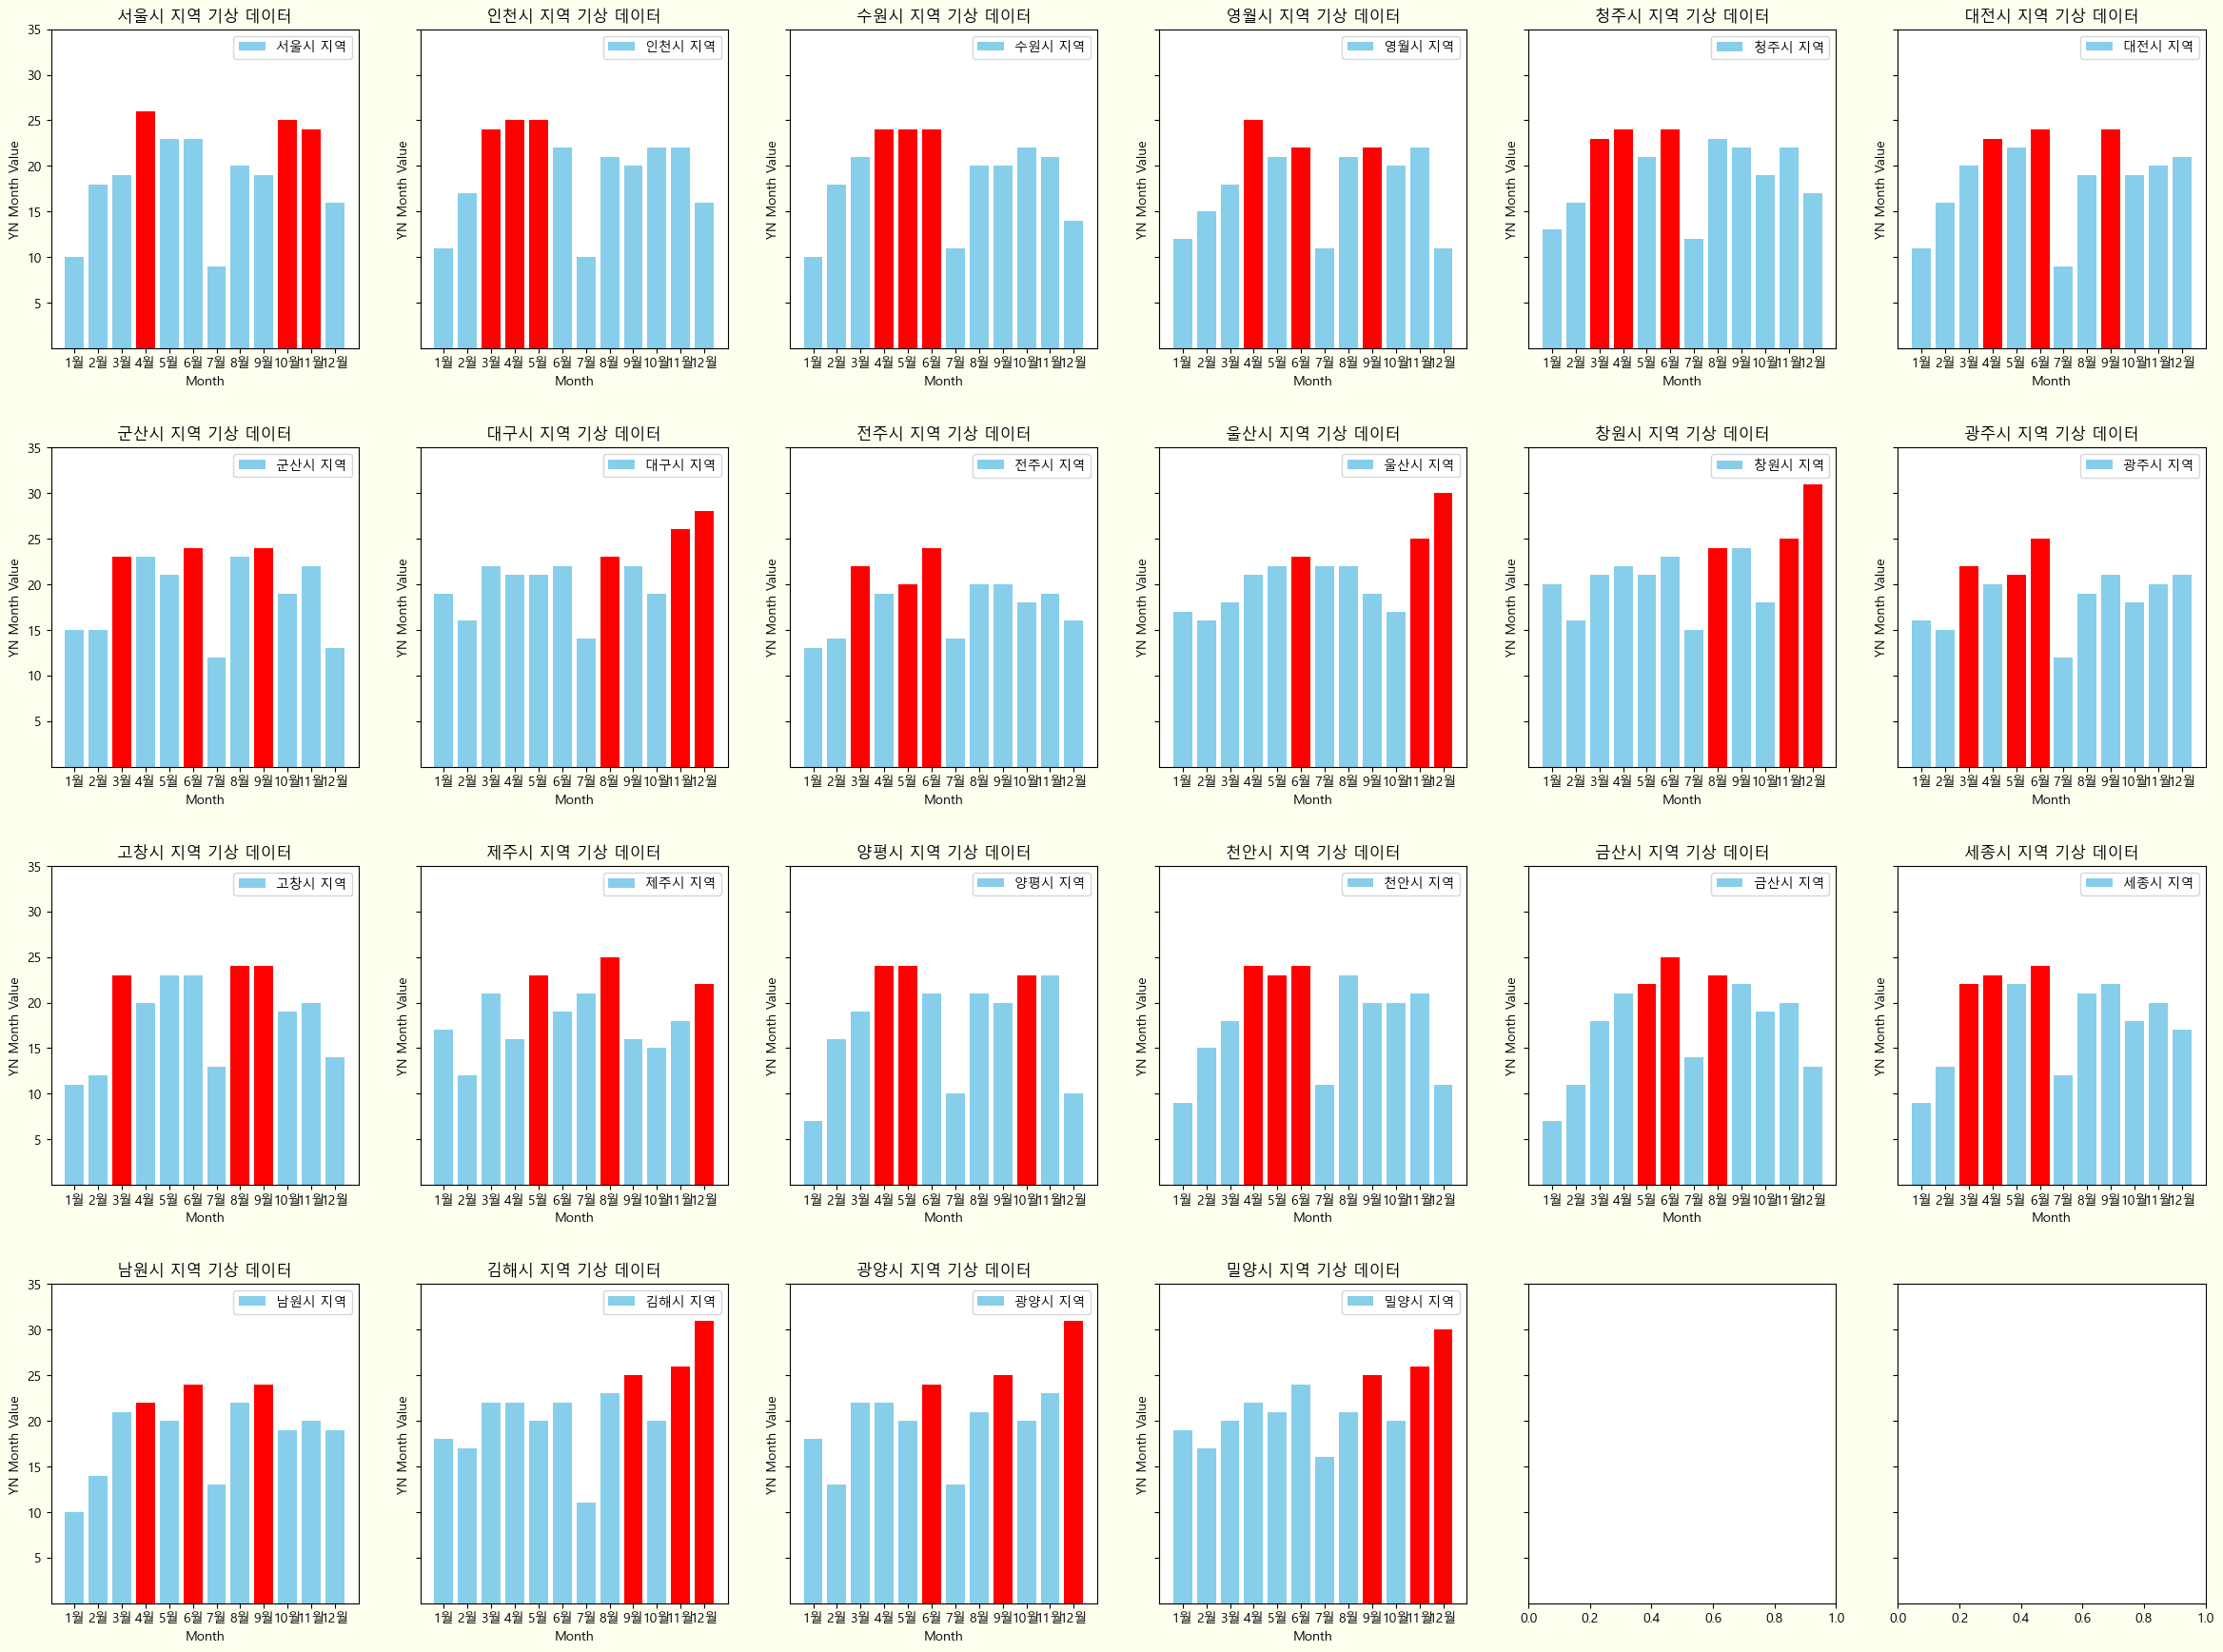

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 'Malgun Gothic' 사용, 다른 OS에서는 해당 폰트를 설정해 주세요.
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정 (4개의 행, 6개의 열로 총 24개의 그래프)
fig, axes = plt.subplots(4, 6, figsize=(24, 18), facecolor='ivory', sharey=True)

# 각 서브 플롯에 대해 그래프 그리기
regions = weather_yn_df['stnNm'].unique()


# Iterate over regions and plot
for i, region in enumerate(regions):
    row = i // 6  # 행 번호 계산 (0부터 5까지)
    col = i % 6   # 열 번호 계산 (0부터 3까지)

    # 해당하는 Axes 객체 선택
    ax = axes[row, col]

    # 해당 지역의 데이터프레임을 동적으로 호출
    weather_df = weather_yn_df[weather_yn_df['stnNm']==region']

    # 'yyyymm'에서 월 부분 추출 (예: 202301 -> 1)
    # weather_df['Month'] = weather_df['yyyymm'].apply(lambda x: int(str(x)[4:6]))  # yyyymm에서 월 부분 추출

    # 상위 3개 행을 빨간색으로 표시
    top_3_idx = weather_df['yn_month'].nlargest(3).index  # 상위 3개의 인덱스를 선택
    colors = ['red' if idx in top_3_idx else 'skyblue' for idx in weather_df.index]  # 색상을 지정

    # 막대 그래프 그리기
    ax.bar(weather_df['yyyymm'], weather_df['yn_month'], color=colors, label=f'{region} 지역')

    # 제목 및 레이블 설정
    ax.set_title(f'{region} 지역 기상 데이터', fontsize=12)
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('YN Month Value', fontsize=10)

    # x축 레이블 회전
    ax.tick_params(axis='x')

    # 범례 표시
    ax.legend()

    month_labels = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
    # x축 레이블을 월 이름으로 설정
    ax.set_xticks(range(0,12))  # 1부터 12까지의 ticks
    ax.set_xticklabels(month_labels, fontsize=10)  # '1월', '2월', ...으로 설정

    # y축 값 설정
    ax.set_yticks(range(5, 36, 5))

# 서브 플롯 간의 간격을 자동으로 조정
plt.tight_layout(pad=3.0)  # pad 값을 조정하여 간격을 더 넓게 할 수 있습니다.
plt.savefig('지역별_top3_월_그래프.png')
# 그래프 출력
plt.show()